In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings('ignore')
rand_state= 1000

Let's start by reading in the data and checking to see if there's anything weird going on.

In [221]:
df = pd.read_csv("wage_regularization.csv")

In [222]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


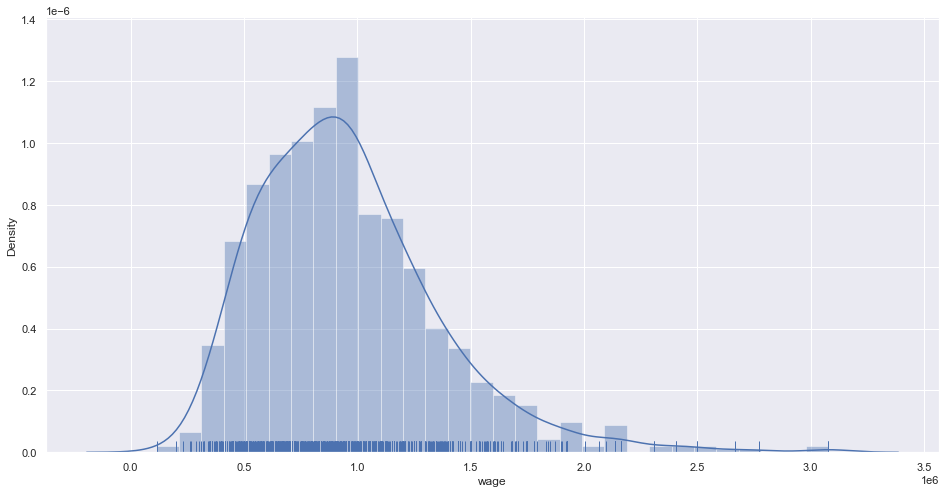

In [286]:
plt.figure(figsize=(16,8))
sns.distplot(df['wage'], rug=True)
plt.show()

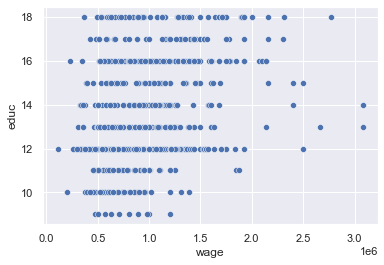

In [288]:
sns.scatterplot(x='wage', y='educ', data=df)
plt.show()

The ranges for age and education are very different. If we want to be able to compare the coeffecients between the two features, we'll need to normalize/standardize them. We'll name the standardized data frame df_sc.

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[-0.46751952, -0.66885143, -0.681389  , ..., -0.70895446,
        -0.72303072, -0.73357606],
       [-0.37101938,  2.06403752,  2.2236843 , ...,  1.29793053,
         1.31081019,  1.32021092],
       [-0.32895523,  0.24211155,  0.1578544 , ..., -0.11772087,
        -0.16164066, -0.20360711],
       ...,
       [-1.03909722, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [-0.21018583, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [ 0.10405818, -0.66885143, -0.681389  , ...,  0.54970162,
         0.51165088,  0.4716505 ]])

In [225]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


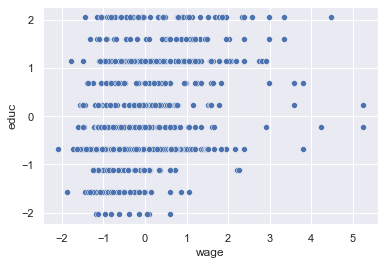

In [290]:
sns.scatterplot(x='wage', y='educ', data=df_sc)
plt.show()

This is much better! Now we'll be able to interpret the coefficients against one another. Let's check out the data and see if there's anything funky going on.

In [226]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    935 non-null    float64
 1   educ    935 non-null    float64
 2   educ2   935 non-null    float64
 3   educ3   935 non-null    float64
 4   educ4   935 non-null    float64
 5   educ5   935 non-null    float64
 6   age     935 non-null    float64
 7   age2    935 non-null    float64
 8   age3    935 non-null    float64
 9   age4    935 non-null    float64
 10  age5    935 non-null    float64
dtypes: float64(11)
memory usage: 80.5 KB


Looking good there! Now we need to set the target and feature variables. Let's see what we're working with: 

In [227]:
df_sc.columns

Index(['wage', 'educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2',
       'age3', 'age4', 'age5'],
      dtype='object')

A model that can make predictions about a persons wage based on education and age would be very useful - let's go with that. Let's set the target as wage and features as everything else - then split the data into 80% training and 20% testing.

In [228]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

Before we get fancy with the penalized regression models, let's run the data in a simple linear model and use it as a benchmark.

In [248]:
sm.OLS(y_train, X_train_wc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           2.83e-17
Time:                        20:53:49   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.160
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0610   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the output above, we see that the R^2 of the simple linear regression model using the training data is 0.128. This is really low and means that there's a lot that influences wage that our model doesn't capture. There are also no features significant at the 5% level. The lowest p-value in the model is 0.575, which is not even close to being statistically significant.

Let's import the appropriate packages and get started fitting the models to see if we can do better!

In [291]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [292]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

Now we can begin predicting wage values for the test set data based on the training set data.

In [293]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [294]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.202696,-0.012852,-0.012852
238,1.910343,0.699718,0.704007,-0.012852,-0.012852
531,-0.700110,-0.065042,0.045579,-0.012852,-0.012852
157,2.328510,0.689508,0.653410,-0.012852,-0.012852
601,1.341239,0.208652,0.171149,-0.012852,-0.012852


Since the predictions for each row under lasso and elastic net are 0, we can see that those models dropped all of the variables and are just reporting the mean/intercept since we didn't optimize alpha. Let's take a closer look at the coefficients for each model.

In [295]:
df.drop('wage', axis=1, inplace=False).columns

Index(['educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2', 'age3',
       'age4', 'age5'],
      dtype='object')

In [296]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,0.169172,0.0,0.0
1,educ2,462.562174,0.309854,0.0,0.0
2,educ3,-736.380870,0.232209,0.0,0.0
3,educ4,527.476085,-0.016857,0.0,0.0
4,educ5,-143.414487,-0.393124,0.0,0.0
5,age,-1295.337040,0.005242,0.0,0.0
6,age2,5164.461994,0.136966,0.0,0.0
7,age3,-7783.011668,0.147814,0.0,0.0
8,age4,5255.053781,0.043936,0.0,0.0
9,age5,-1341.061044,-0.166490,0.0,0.0


The coefficients for the penalized models are very different from those in the simple linear model; and, as we noticed earlier, the coefficients for the lasso and elastic net models were reduced to 0. Let's optimize the alpha for each penalized model and see how this changes.

In [297]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

10.0

In [298]:
alpha_ridge_opt = ridgecv.alpha_

In [299]:
#Cross validation to find the optimal alpha for Lasso regression
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.010732138475800224

In [300]:
alpha_lasso_opt = lassocv.alpha_

In [301]:
#Cross validation to find the optimal alpha for Elastic Net regression
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.010682821217946607

In [302]:
alpha_elasticnet_opt = elasticnetcv.alpha_

Now that we have those, let's refit the models!

In [303]:
model_linear_opt = LinearRegression()
model_ridge_opt = Ridge(alpha=10)
model_lasso_opt = Lasso(alpha=0.010732138475800224)
model_net_opt = ElasticNet(alpha=0.010682821217946607)
y_hat_opt_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_opt_ridge = model_ridge_opt.fit(X_train, y_train).predict(X_test)
y_hat_opt_lasso = model_lasso_opt.fit(X_train, y_train).predict(X_test)
y_hat_opt_net   = model_net_opt.fit(X_train, y_train).predict(X_test)
df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_opt_ridge,
                               'y_hat_lasso':y_hat_opt_lasso,
                               'y_hat_net':y_hat_opt_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.207593,-0.213254,-0.214806
238,1.910343,0.699718,0.755765,0.808387,0.809270
531,-0.700110,-0.065042,0.052495,0.023871,0.037489
157,2.328510,0.689508,0.700613,0.761422,0.757606
601,1.341239,0.208652,0.165839,0.155527,0.158446


This is looking **much** better. Let's find out which model is doing best using the RMSE for each.

In [304]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_linear = sqrt(mean_squared_error(y_test, y_hat_linear))
rmse_test_linear

0.8650244001020653

In [305]:
rmse_test_ridge = sqrt(mean_squared_error(y_test, y_hat_opt_ridge))
rmse_test_ridge

0.8669843295392662

In [306]:
rmse_test_lasso = sqrt(mean_squared_error(y_test, y_hat_opt_lasso))
rmse_test_lasso

0.8681611530299667

In [307]:
rmse_test_net = sqrt(mean_squared_error(y_test, y_hat_opt_net))
rmse_test_net

0.8676093910065269

In [308]:
output = pd.DataFrame(columns=['RMSE_test'], index=['Linear', 'Ridge', 'Lasso', 'E. Net'])
output['RMSE_test']=rmse_test_linear, rmse_test_ridge, rmse_test_lasso, rmse_test_net
output

,RMSE_test
Linear,0.865024
Ridge,0.866984
Lasso,0.868161
E. Net,0.867609


The penalized models are close - but they don't beat the simple linear model. The models ranked in descending order based on their RMSE in the test set are:

-Linear

-Ridge

-Elastic Net

-Lasso

Let's plot the coefficients vs alphas for each of the penalized regression models and see what's happening with each as we increase alpha.

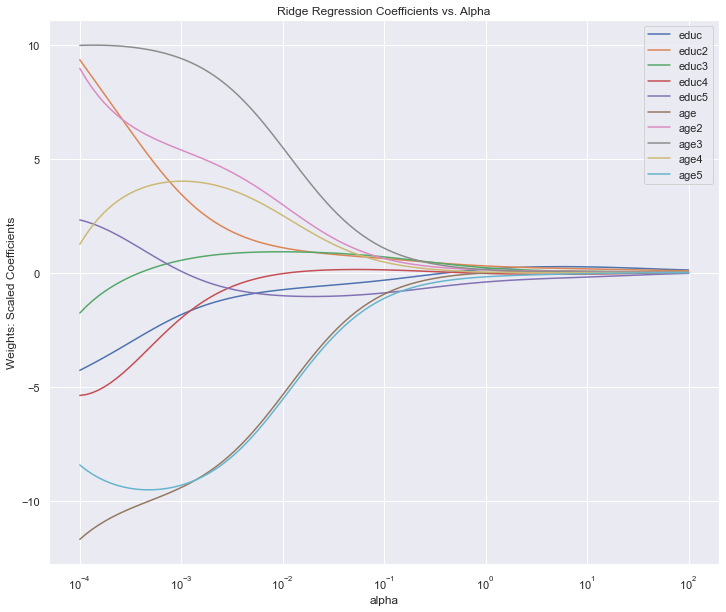

In [217]:
alpha_ridge = 10**np.linspace(-4,2,100)
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Weights: Scaled Coefficients')
plt.title('Ridge Regression Coefficients vs. Alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

In this model, the coefficents that start off the strongest when alpha is 10^(-4) are age, age^3, and age^5, but all the coefficients get very close to zero at the optimal alpha (10 for this model). The only coefficient that seems to be staying bigger than the rest is education^5.

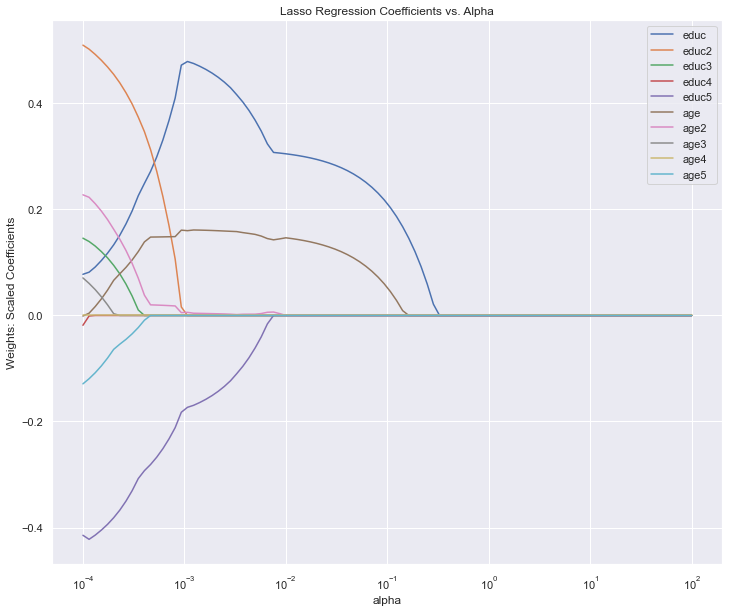

In [187]:
alpha_lasso = 10**np.linspace(-4,2,100)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Weights: Scaled Coefficients')
plt.title('Lasso Regression Coefficients vs. Alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

In the above graph, we can see that the variables that stay consistently strong as alpha is increased are education, wage, and education^5. Once alpha is at 10^(-2) education^5 drops out and age and education stay strong before dropping out when alpha gets a little bigger than 10^(-1) (which is the optimal alpha for the model).

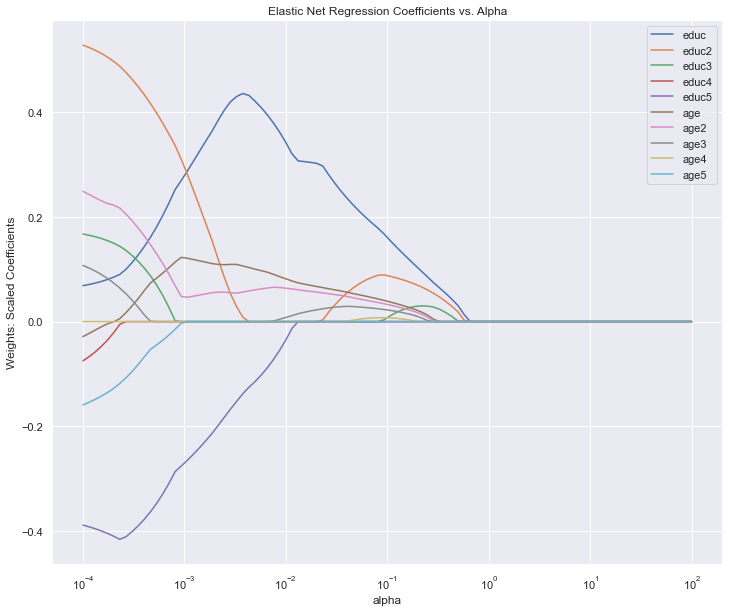

In [218]:
alpha_elasticnet = 10**np.linspace(-4,2,100)

elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Weights: Scaled Coefficients')
plt.title('Elastic Net Regression Coefficients vs. Alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

There is a lot going on in the above graph - some variables are dropping to zero and jumping back up, but there are some variables that also retain pretty consistent significance. Education and education^5 seem to be nonzero pretty consistently, with others like education^4 and age^4 staying at or very close to zero regardless of the size of alpha. At the optimal alpha for the model (around 10^(-2)) the nonzero coefficents are education, education^5, age, age^2, and age^3.